# Heart disease prediction using neural network
### by Xige Yang

As AI and deep learning are growing rapidly during the recent years, artificial neural network (ANN) is becoming more and more popular among all the machine learning methods. The raise of neural network maybe rooted in an image classification contest (ILSVRC, 2012) sponsored by ImageNet (see my __[previous notebook](https://github.com/yxgyylj/DeepNN/blob/master/ImageNets/ImageNet_compare.ipynb)__). The useage of deep convolutionary network (CNN) significantly outperformed all the other traditional computer version methods. Since then, neural networks has seen far more applications in almost all data-intensive areas.

In this notebook, we want to have a initial feeling on how a neural network works for predictive problems, how it compares with other popular machine learning methods. To do this, we build a simple neural network (NN) to predict heart disease (which is trained on UCI heart disease dataset), play with hyperparameters of the NN, and finally compare it with some other widely used classifiers in Python _sklearn_ package.

### Load required packages and the Heart_diease dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import pydotplus

from IPython.display import Image

from scipy import interp

# Standard ML library
from sklearn.preprocessing import StandardScaler
from sklearn.externals.six import StringIO  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# Hyperparameter tuning
import talos as ts
from talos import Reporting

# Tensorflow-keras
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import Sequential # The common deep learning network
from keras.layers.core import Dense, Activation
from keras.activations import relu, elu, selu, sigmoid, exponential, tanh

# Load data set
df = pd.read_csv("heart.csv")

/Users/Shared/anaconda/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
/Users/Shared/anaconda/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,


### Visualize the data
Let's see how the heart disease dataset is like:

In [5]:
print(df.shape)
df.head(8)

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


It has 14 different features, here's what they mean:

* __age__: The person's age in years
* __sex__: The person's sex (1 = male, 0 = female)
* __cp__: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* __trestbps__: The person's resting blood pressure (mm Hg on admission to the hospital)
* __chol__: The person's cholesterol measurement in mg/dl
* __fbs__: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* __restecg__: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* __thalach__: The person's maximum heart rate achieved
* __exang__: Exercise induced angina (1 = yes; 0 = no)
* __oldpeak__: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* __slope__: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* __ca__: The number of major vessels (0-3)
* __thal__: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* __target__: Heart disease (0 = no, 1 = yes)

We visualize the data using density plots of randomly chosen features:

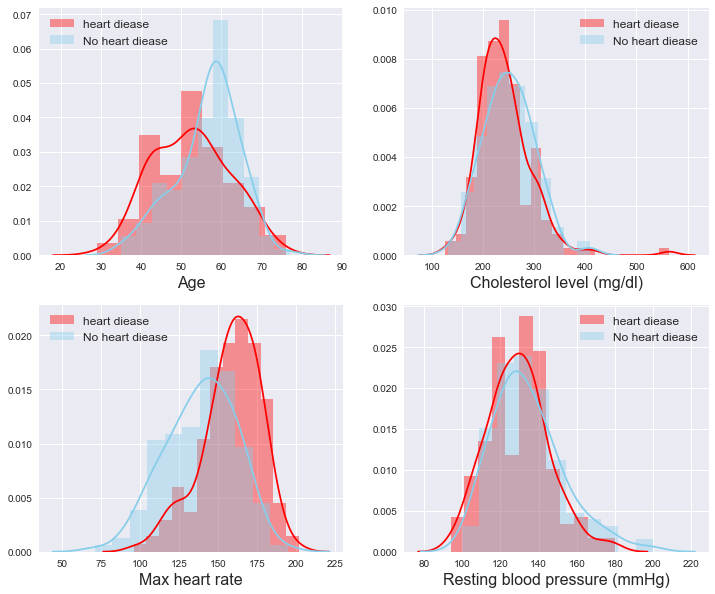

In [6]:
# Visualize some distribution plots

fig1, ax1 = plt.subplots(2, 2, figsize=(12, 10))
sns.distplot(df["age"][df["target"]==1], color="red", label="heart diease", ax=ax1[0, 0])
sns.distplot(df["age"][df["target"]==0] , color="skyblue", label="No heart diease", ax=ax1[0, 0])
ax1[0, 0].set_xlabel('Age',fontsize = 16)
ax1[0, 0].legend(fontsize = 12)

sns.distplot(df["chol"][df["target"]==1], color="red", label="heart diease", ax=ax1[0, 1])
sns.distplot(df["chol"][df["target"]==0] , color="skyblue", label="No heart diease", ax=ax1[0, 1])
ax1[0, 1].set_xlabel('Cholesterol level (mg/dl)',fontsize = 16)
ax1[0, 1].legend(fontsize = 12)

sns.distplot(df["thalach"][df["target"]==1], color="red", label="heart diease", ax=ax1[1, 0])
sns.distplot(df["thalach"][df["target"]==0] , color="skyblue", label="No heart diease", ax=ax1[1, 0])
ax1[1, 0].set_xlabel('Max heart rate',fontsize = 16)
ax1[1, 0].legend(fontsize = 12)

sns.distplot(df["trestbps"][df["target"]==1], color="red", label="heart diease", ax=ax1[1, 1])
sns.distplot(df["trestbps"][df["target"]==0] , color="skyblue", label="No heart diease", ax=ax1[1, 1])
ax1[1, 1].set_xlabel('Resting blood pressure (mmHg)',fontsize = 16)
ax1[1, 1].legend(fontsize = 12)

### Correlation heatmap
Let's see the correlation matrix of the heart disease dataset. Hotter the color is, the more correlated the features are.

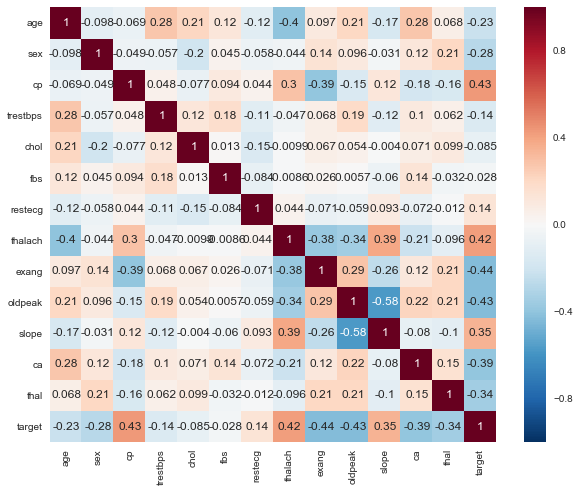

In [7]:
sns.heatmap(df.corr(),annot=True) 
fig=plt.gcf()
fig.set_size_inches(10,8)

### Data processing

### Step 1 -- Clean the data
Since for a large dataset, there might be missing data or dirty data (e.g. outliers), data preprocessing is very important.

First, let's check the missing data

In [8]:
#Checking Missing Data
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

which means there is no missing data, so let's proceed to get rid of outliers. Let's get the box plot for the outliers:

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text xticklabel objects>)

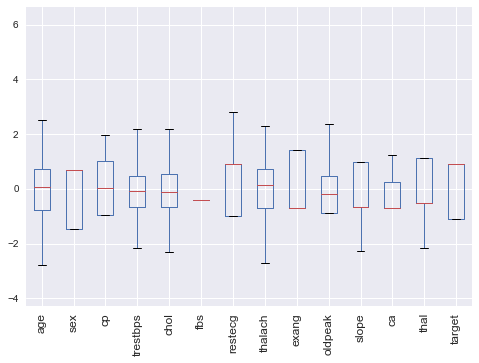

In [9]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = pd.DataFrame(data=scaler.transform(df))
df_scaled.columns = df.columns
df_scaled.boxplot()
plt.xticks(rotation = 90)

In [10]:
from collections import Counter
def detect_outliers(df,n,features):

    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        outliers = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outliers)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers
Outliers_to_drop = detect_outliers(df,2,['trestbps', 'chol','thalach'])
df.loc[Outliers_to_drop]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


As we can see, the data is pretty clean!

### Step 2 -- Prepare for training
Let Y be the targets 0 or 1 under the targets col, and X be the data in the rest of the cols which we will use as factors that we assume will affect the outcome of the target. Then we split the data up into the training set and the validation set.

In [11]:
X = df.drop("target",axis=1)
y = df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)
print 'Training set dimension: ', X_train.shape
print 'Training set positive: ', y_train[y_train==1].size, '\tTraining set negative: ', y_train[y_train==0].size
print 'Testing set dimension: ', X_test.shape
print 'Testing set positive: ', y_test[y_test==1].size, '\tTesting set negative: ', y_test[y_test==0].size

# rescale the data
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled  = StandardScaler().fit_transform(X_test)

#y_train = np_utils.to_categorical(y_train,2)
#y_test = np_utils.to_categorical(y_test,2)

Training set dimension:  (242, 13)
Training set positive:  135 	Training set negative:  107
Testing set dimension:  (61, 13)
Testing set positive:  30 	Testing set negative:  31


### Step 3 -- Build the neural network model

In [10]:
model_NN = Sequential() # load the sequential model
model_NN.add(Dense(8,  input_shape=(13,), activation='relu'))
model_NN.add(Dense(8, activation='relu'))
model_NN.add(Dense(1, activation='sigmoid'))

model_NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NN = model_NN.fit(X_train, y_train,
                epochs=150,
                batch_size=10,
                validation_data=(X_test,y_test),
                verbose=0)

Let's display the training process by visualizing its accuracy and loss.

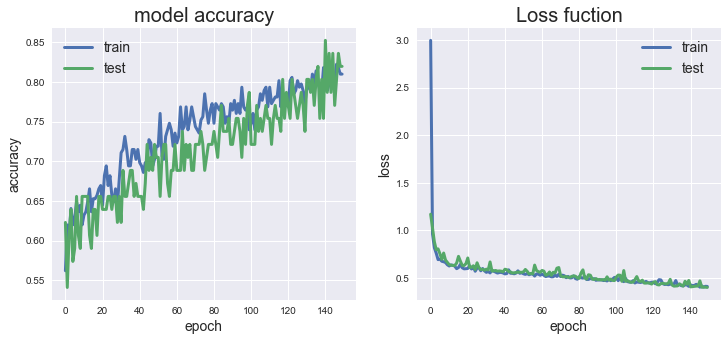

In [11]:
fig1, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(NN.history['acc'], lw = 3)
ax[0].plot(NN.history['val_acc'], lw = 3)
ax[0].set_title('model accuracy', fontsize = 20)
ax[0].set_ylabel('accuracy', fontsize = 14)
ax[0].set_xlabel('epoch', fontsize = 14)
ax[0].legend(['train', 'test'], fontsize = 14)

ax[1].plot(NN.history['loss'], lw = 3)
ax[1].plot(NN.history['val_loss'], lw = 3)
ax[1].set_title('Loss fuction', fontsize = 20)
ax[1].set_ylabel('loss', fontsize = 14)
ax[1].set_xlabel('epoch', fontsize = 14)
ax[1].legend(['train', 'test'], fontsize = 14)

### Step 4 -- Model performance
After training our neural network, we would like to see how it works. There are many different tools measuring model performance, and probably the most direct one is __prediction accuracy (score)__. In addition, when we are treating unbanlanced data, prediction score alone may not be persuasive enough because unexcepted large prediction error may happen we the model is applied onto the smaller category. In this case, __precision__, __recall__ and __F1 score__ (the harmonic average of precision and recall) are more dependable measurements.

In [12]:
score = model_NN.evaluate(X_test, y_test, batch_size=16)
prediction = model_NN.predict(X_test)

print("%s: %.2f%%" % (model_NN.metrics_names[1], score[1]*100))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, np.round(prediction)))
print("\nClassification Report:")
print(classification_report(y_test, np.round(prediction)))

61/61 [==============================] - 0s 95us/step
acc: 81.97%

Confusion Matrix:
[[23  8]
 [ 3 27]]

Classification Report:
             precision    recall  f1-score   support

          0       0.88      0.74      0.81        31
          1       0.77      0.90      0.83        30

avg / total       0.83      0.82      0.82        61



In addition, we draw the ROC (Receiver Operating Characteristic) curve of our neural network and calculate AUC (Area Under Curve):

Text(0.5,1,'ROC of Neural Network (AUC = 0.91)')

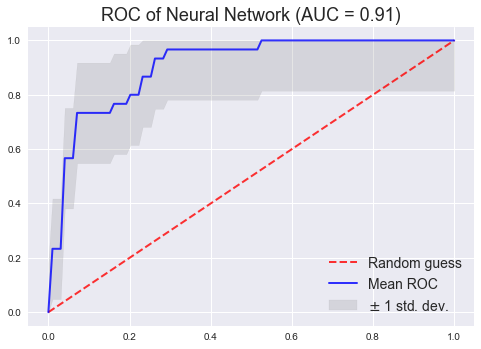

In [27]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
count = 0

probas_ = model_NN.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_)
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)

# Graphic stuff
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random guess', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
     label=r'Mean ROC',
     lw=2, alpha=.8)

# Plot variation area
std_tpr = np.std(tprs)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
             label=r'$\pm$ 1 std. dev.')
plt.legend(fontsize=14)
plt.title('ROC of Neural Network (AUC = %0.2f)' % (roc_auc), fontsize=18)

### Hyperparameter Tuning
A hyperparameter is a parameter from a prior distribution, it captures the prior belief before data is observed. In our neural network, we define hyperparameters to be the following

In [15]:
p = {
    'batch_size': [8,10,12],
    'First_Neron' : [6,8,10],
    'Second_Neron' : [6,8,10],
    'epochs': [50,100,150]
}

In [16]:
def get_model(X_train,y_train,X_test,y_test,params):
    model = Sequential() # load the sequential model
    model.add(Dense(params['First_Neron'], input_shape=(13,), activation='relu'))
    model.add(Dense(params['Second_Neron'], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    out = model.fit(X_train, y_train,
                    epochs=params['epochs'],
                    batch_size=params['batch_size'],
                    validation_data=(X_test,y_test),
                    verbose=0)
            
    return out, model

In [16]:
start = time.time()
t = ts.Scan(x=X_train, y=y_train, 
            x_val=X_test, y_val=y_test, 
            params=p, model=get_model)
end = time.time()
print('Time elapsed for hyperparameter tuning: %.2f s' % (end - start))

100%|██████████| 81/81 [05:51<00:00,  3.62s/it]

Time elapsed for hyperparameter tuning: 351.40 s


In [131]:
r = Reporting(t)
print 'The highest accuracy is: %.2f%%' % (float(r.high()) * 100)

The highest accuracy is: 88.52%


In [146]:
frame = t.data
frame[frame['val_acc'] >= '0.86'].style.format("{:.6}")

## Compare with machine learning models with sklearn
Up to this point, one may wounder if our neural network classifier is the best model amoung all the classifiers. To illustrate this, in this section, we compare our NN classifier with other commonly used supervised learning methods. These methods are:
* Logistic regression;
* Decision tree;
* Gradient-boosted tree;
* Random forest;
* Extremely randomized tree;
* Adaptive boosting;
* K-nearest neighbors (KNN);
* Linear and kernel (radial base functions) support vector machine;
* Naive Bayes.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

classifiers=[['Logistic Regression',LogisticRegression()],
       ['Decision Tree',DecisionTreeClassifier()],
       ['Extremely Randomized Trees', ExtraTreesClassifier()],
       ['Random Forest',RandomForestClassifier(max_depth=5)],
       ['Gradient Boosting', GradientBoostingClassifier(learning_rate=.5)],
       ['Ada Boosting',AdaBoostClassifier()],
       ['K-Nearest Neighbors',KNeighborsClassifier()],
       ['Linear Support Vector Machine',SVC(kernel='linear',probability=True)],
       ['Support Vector with RBF Kernel',SVC(gamma=.1,probability=True)],
       ['Gausian Naive Bayes',GaussianNB()]]
cla_pred=[]
df_compare = pd.DataFrame(columns=['Accuracy', 'Training Time'])
probs=dict()

#fig2, ax2 = plt.subplots(2, 5)#, figsize=(10, 10))

for name, model in classifiers:
    t0 = time.time()
    probas_ = model.fit(X_train,y_train)
    t1 = time.time()
    probs.update({name : probas_})
    prediction = model.predict(X_test)
    cla_pred.append(accuracy_score(y_test,prediction))
    #print("%s: %.2f%%,\t training time: %.4f s" % (name,accuracy_score(y_test,prediction)*100, t1-t0))
    #print("\tClassification Report:")
    #print(classification_report(y_test, prediction))
    #print('\n')
    df_compare.loc[name] = ['%.2f%%' % (cla_pred[-1]*100), '%.4f s' % (t1-t0)]
    if name == 'Random Forest':
        estimator = model.estimators_[1]

df_compare

,Accuracy,Training Time
Logistic Regression,86.89%,0.0024 s
Decision Tree,81.97%,0.0011 s
Extremely Randomized Trees,81.97%,0.0480 s
Random Forest,85.25%,0.0283 s
Gradient Boosting,83.61%,0.0511 s
Ada Boosting,81.97%,0.1146 s
K-Nearest Neighbors,65.57%,0.0004 s
Linear Support Vector Machine,83.61%,1.9205 s
Support Vector with RBF Kernel,49.18%,0.0170 s
Gausian Naive Bayes,85.25%,0.0008 s


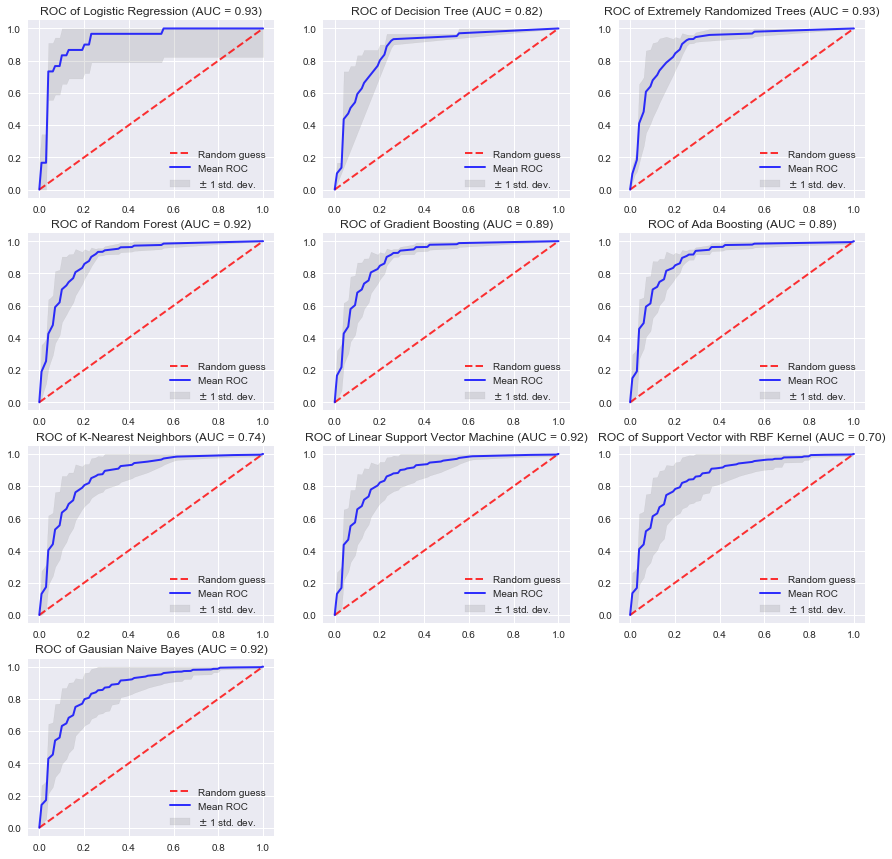

In [28]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
count = 0

fig2, ax2 = plt.subplots(4, 3, figsize = (15,15))
ax2[-1,-1].axis('off')
ax2[-1,-2].axis('off')

for name, model in classifiers:
    count = count + 1
    probas_ = probs[name].predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    ind1, ind2 = np.int(count/3) if count%3!=0 else np.int((count-1)/3), 2 if count%3==0 else count%3-1
    
    # Plot Roc Curve
    ax2[ind1, ind2].plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random guess', alpha=.8)
    ax2[ind1, ind2].set_title('ROC of %s (AUC = %0.2f)' % (name, roc_auc))
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax2[ind1, ind2].plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC',
         lw=2, alpha=.8)
    
    # Plot variation area
    std_tpr = np.std(tprs) if name == 'Logistic Regression' else np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax2[ind1, ind2].fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
    ax2[ind1, ind2].legend()
    

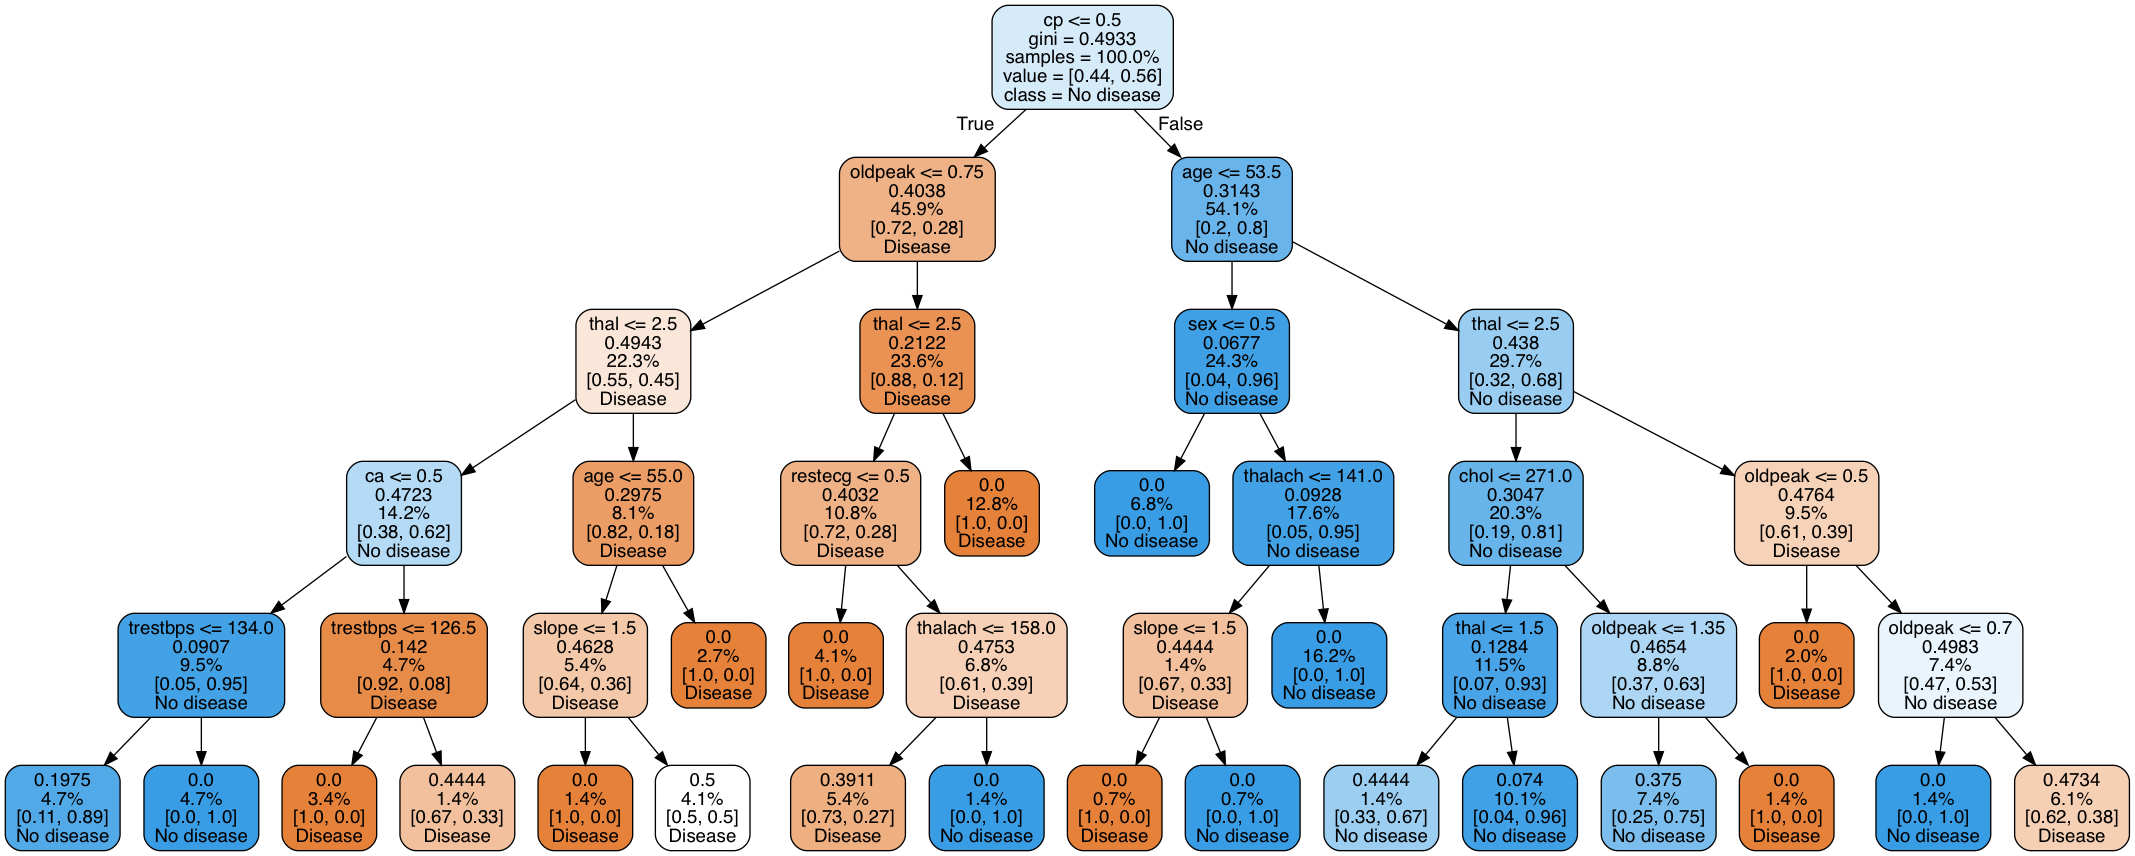

In [66]:
feature_names = [i for i in X_train.columns]
y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'No disease'
y_train_str[y_train_str == '1'] = 'Disease'

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',filled = True)

graph = pydotplus.graphviz.graph_from_dot_file('tree.dot')
Image(graph.create_png())